# <font color='Blue'>Clustering K-Medoids</font>

# <font color='Blue'>KMedoids (PAM)</font>

The algorithm is less sensitive to outliers tham K-Means. The principle difference between K-Medoids and K-Medians is that K-Medoids uses existed points from input data space as medoids, but median in K-Medians can be unreal object 

Before you execute this code, please install KMedoids from sklearn. It can be done through the following steps.
  
  conda install -c conda-forge scikit-learn-extra
  Restart Kernel

For more information you may visit
  https://scikit-learn-extra.readthedocs.io/en/latest/install.html

## <font color='Blue'>Loading Libraries</font>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn_extra.cluster import KMedoids
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## <font color='Blue'>1.0 Clustering - Example 1</font>

## <font color='Blue'>1.1 Loading Data</font>

Let's us look at an example. We will use a small dataset of customers containing their age and income information. We can 
understand the customer segments that might exist and the key attributes of each segment

Example Data Set - Income Data. CSV

In [27]:
customers_df = pd.read_csv( "Income Data.csv" )

# Attributes - income and age
# No of records - 300
print("customers_df information")
print("_________________________________________")
print(customers_df.info())
print("_________________________________________")
print(customers_df.head(5))
print("_________________________________________")

customers_df information
_________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   income  300 non-null    float64
 1   age     300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB
None
_________________________________________
    income    age
0  41100.0  48.75
1  54100.0  28.10
2  47800.0  46.75
3  19100.0  40.25
4  18200.0  35.80
_________________________________________


## <font color='Blue'>2.0 Visualize the relationship between  income and age</font>

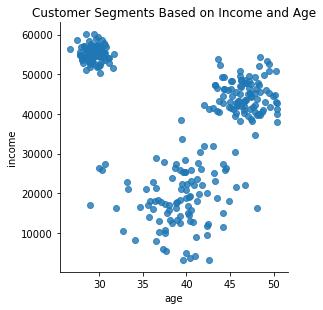

In [28]:
# For this purpose scatter plots are useful (when we have few attributes)
sn.lmplot( "age", "income", data=customers_df, fit_reg = False, size = 4 );
plt.title( "Customer Segments Based on Income and Age");

Three segments are observed from the picture

      1. On the top-left of the graph, we have low age - high income group
      2.On the top-right of the graph, we have high age - medium income group
      3.on the bottom of the graph, we have low income group spread across all ages

## <font color='Blue'>3.0 K-Medoids clustering </font>

<b> Steps in K-Medoids clustering </b>

   1. Decide the value of k (Can be fine-tuned later) 
   2. Choose k centroids randomly
   4. Assign observations to K centroids based on distance
   5. Adjust the centroid after adding new observations.
   6. Reassign the observations to the new centroid.
   7. Repeat steps 4 to 6 untill there are no more re-assignments

### <font color='Blue'>3.1 Normalizing Features</font>

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_customers_df = scaler.fit_transform(customers_df[["age", "income"]] )
print(type(scaled_customers_df))
scaled_customers_df[0:10]
scaled_customers_df = scaled_customers_df.tolist()
type(scaled_customers_df)

<class 'numpy.ndarray'>


list

### <font color='Blue'>3.2 Executing k-Medoids</font>

In [30]:
clusters = KMedoids(3)
clusters.fit(scaled_customers_df)

KMedoids(n_clusters=3)

### <font color='Blue'>3.3 Assigning Cluser Labels</font>

In [31]:
# Assign the cluster lables
customers_df["clusterid"] = clusters.labels_
customers_df[0:5]
cluster_size = customers_df.groupby(['clusterid']).size() 
print(cluster_size)

clusterid
0    100
1    103
2     97
dtype: int64


### <font color='Blue'>3.4 Validation</font>
### <font color='Blue'>3.4.1 Validation - Silhoutee Coefficient</font>

In [32]:
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(scaled_customers_df, clusters.labels_))
# Silhouette score between -1 and 1

Silhouette Coefficient: 0.739


### <font color='Blue'>3.4.2 Validation - Calinski-Harabasz index</font>

In [33]:
# Higher the better
print("Calinski-Harabasz index: %0.3f"% metrics.calinski_harabasz_score(scaled_customers_df, clusters.labels_))

Calinski-Harabasz index: 1379.770


### <font color='Blue'>3.5 Plotting Results</font>

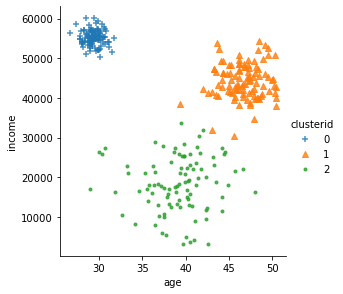

In [34]:
# Plotting the customers with their segments
markers = ['+','^','.']
sn.lmplot( "age", "income",data=customers_df,hue = "clusterid",fit_reg=False,markers = markers,size = 4 );

### <font color='Blue'>3.6 Obtaining Cluster Centers and Interpretation</font>

In [35]:
result = customers_df.groupby('clusterid')['age','income'].agg( ["median",'std'] ).reset_index() 
result['cluster_size'] = cluster_size
result

clusterid     age             income              cluster_size
             median       std   median          std             
0         0  29.375  0.921458  55200.0  1951.943864          100
1         1  46.700  2.151559  44300.0  4390.321503          103
2         2  39.450  3.558665  18200.0  6924.747691           97

<b> Interpretation </b>

    KMedoids and KMeans have similar results on this data

    The clusters can be interpreted as follows
    Cluster A: Low Age (29) and High Income (55K)
    Cluster B: Mid Age (39) and Low Income  (18K)
    Cluster C: High Age (46) and Medium Income (43K)   